In [8]:
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import numpy as np

In [2]:
train_file = 'E:/Curious Dev B/Kaggle/train.csv'
test_file = 'E:/Curious Dev B/Kaggle/test.csv'

In [3]:
#import data from files
def get_data_with_label(file):
    fh = open(file)
    ct = 0
    labels = []
    images = []
    for line in fh:
        ct += 1
        if ct == 1:
            continue
        pix_str = line.split(',')
        labels.append(float(pix_str[0]))
        pix_np = np.asarray(pix_str[1:], dtype = float)
        pix_np_split = np.array_split(pix_np, 28)
        pix_np_split_asarray = np.asarray(pix_np_split, dtype = 'float')
        images.append(pix_np_split_asarray)
    return images, labels

def get_data(file):
    fh = open(file)
    ct = 0
    images = []
    for line in fh:
        ct += 1
        if ct == 1:
            continue
        pix_str = line.split(',')
        pix_np = np.asarray(pix_str, dtype = float)
        pix_np_split = np.array_split(pix_np, 28)
        pix_np_split_asarray = np.asarray(pix_np_split, dtype = 'float')
        images.append(pix_np_split_asarray)
    return images

In [4]:
tr_img_list, tr_lb_list = get_data_with_label(train_file)
t_img_list = get_data(test_file)

training_images = np.asarray(tr_img_list)
training_labels = np.asarray(tr_lb_list)
testing_images = np.asarray(t_img_list)

In [5]:
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)

(42000, 28, 28)
(42000,)
(28000, 28, 28)


In [6]:
training_labels = np.asarray(training_labels, dtype = 'float')

In [7]:
#increase rank of np.array
training_images = np.expand_dims(training_images, axis = 3)
testing_images = np.expand_dims(testing_images, axis = 3)

print(training_images.shape)
print(testing_images.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [13]:
#Image Generator
train_datagen = ImageDataGenerator(
                rescale = 1/255)

train_datagen.fit(training_images)

train_generator = train_datagen.flow(training_images,
                                     training_labels,
                                     batch_size = 20,
                                     shuffle = True)

In [17]:
model = Sequential([
    Conv2D(16, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation = 'relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               410112    
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [26]:
history = model.fit(train_generator,
                   epochs = 15)

  ...
    to  
  ['...']
Train for 2100 steps
Epoch 1/15
2100/2100 [==============================] - 155s 74ms/step - loss: 0.0323 - accuracy: 0.9904
Epoch 2/15
2100/2100 [==============================] - 172s 82ms/step - loss: 0.0300 - accuracy: 0.9907
Epoch 3/15
2100/2100 [==============================] - 180s 86ms/step - loss: 0.0278 - accuracy: 0.9920
Epoch 4/15
2100/2100 [==============================] - 183s 87ms/step - loss: 0.0257 - accuracy: 0.9927
Epoch 5/15
2100/2100 [==============================] - 140s 67ms/step - loss: 0.0246 - accuracy: 0.9925
Epoch 6/15
2100/2100 [==============================] - 143s 68ms/step - loss: 0.0228 - accuracy: 0.9935
Epoch 7/15
2100/2100 [==============================] - 140s 67ms/step - loss: 0.0221 - accuracy: 0.9938
Epoch 8/15
2100/2100 [==============================] - 141s 67ms/step - loss: 0.0206 - accuracy: 0.9943
Epoch 9/15
2100/2100 [==============================] - 132s 63ms/step - loss: 0.0203 - accuracy: 0.9948
Epoch 10/

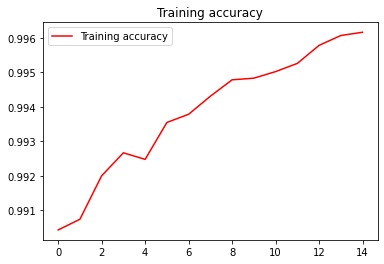

<Figure size 432x288 with 0 Axes>

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [28]:
result = model.predict(testing_images)
test_labels = []
for i in result:
    for j in range(len(i)):
        if i[j] == max(i):
            test_labels.append(j)

In [30]:
fh = open('E:/Curious Dev B/Kaggle/results - Digit Recogniser(24).csv', 'w')
ct = 0
for i in test_labels:
    ct += 1
    fstr = str(ct)+','+str(i)+','+'\n'
    fh.write(fstr)

In [ ]:
from IPython.display import display
from PIL import Image
testing_images.shape = (28000, 28, 28)
for i in testing_images[27900:]:
    img = Image.fromarray(np.uint8((i)*255))
    display(img)